## Introduction

The purpose of this project is to create a machine learning model that is able to correctly predict with a high enough accuracy whether a person is at risk of a heart-attack based on varying factors such as their age, gender, and more. 

We want to answer the question of whether heart-attacks are sudden onset attacks that happen at random or are predictable and...

# Imports

In [57]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold   
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



First, we should highlight the details of the dataset we currently possess. This includes size, attributes, and logistics.

This means whether an attribute is continous, discrete and more.

In [58]:
df = pd.read_csv('./heart.csv')
df.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0


In [59]:
print(f'There are {df.shape[0]} people that are included in this dataset and we are provided with {df.shape[1]} attributes to work with\n')
df.describe()

There are 303 people that are included in this dataset and we are provided with 14 attributes to work with



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [60]:
# numerical data
numerical_data = df.loc[:, ~(df == 0).any()]
numerical_data

,age,trtbps,chol,thalachh
0,63,145,233,150
1,37,130,250,187
2,41,130,204,172
3,56,120,236,178
4,57,120,354,163
...,...,...,...,...
298,57,140,241,123
299,45,110,264,132
300,68,144,193,141
301,57,130,131,115


In [61]:
categorical_data = df.loc[:, (df == 0).any()]
categorical_data

,sex,cp,fbs,restecg,exng,oldpeak,slp,caa,thall,output
0,1,3,1,0,0,2.3,0,0,1,1
1,1,2,0,1,0,3.5,0,0,2,1
2,0,1,0,0,0,1.4,2,0,2,1
3,1,1,0,1,0,0.8,2,0,2,1
4,0,0,0,1,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0,3,0
299,1,3,0,1,0,1.2,1,0,3,0
300,1,0,1,1,0,3.4,1,2,3,0
301,1,0,0,1,1,1.2,1,1,3,0


C:\Users\jason\AppData\Local\Temp\ipykernel_45328\142904074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data.loc[:, 'sex'] = df['sex']


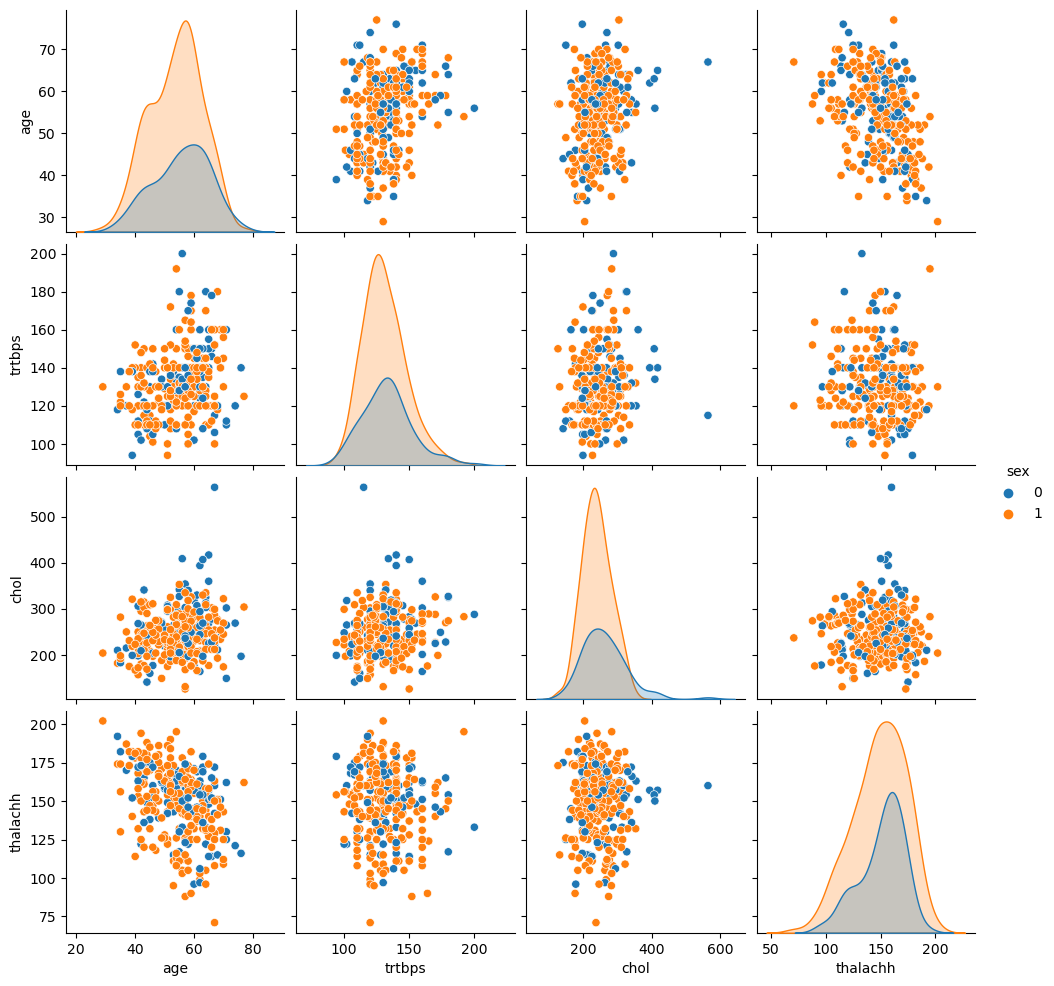

In [62]:
numerical_data.loc[:, 'sex'] = df['sex']
sns.pairplot(numerical_data, hue = 'sex')

C:\Users\jason\AppData\Local\Temp\ipykernel_45328\3865098197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['age'] = df_age['age'] > 45


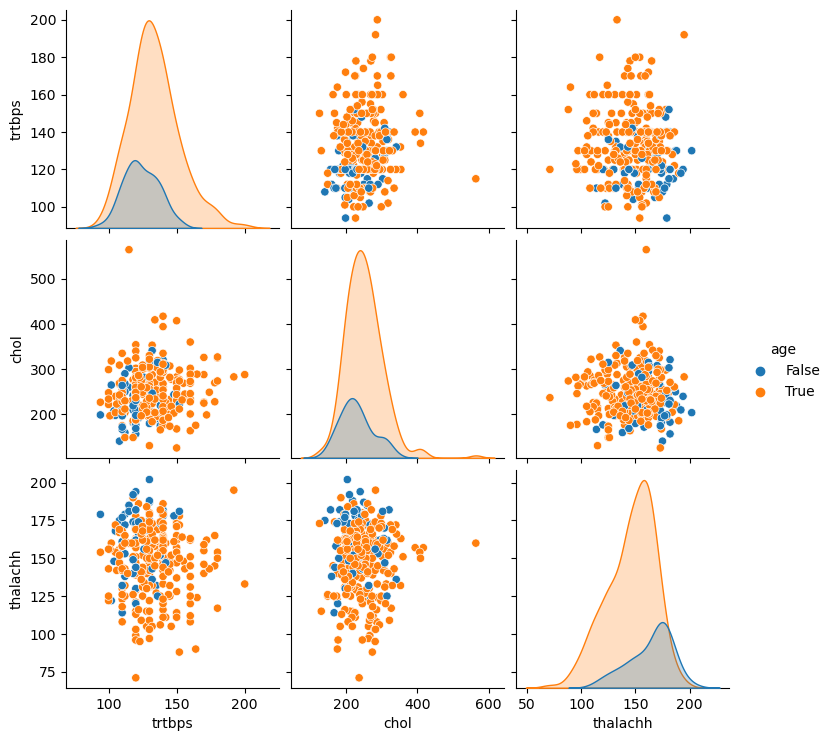

In [63]:
df_age = df.loc[:, ~(df == 0).any()]
df_age['age'] = df_age['age'] > 45
sns.pairplot(df_age, hue = 'age')

# Data Details (Numerical)
Age describes the person's age. This is relevant due to the evidence that suggests that once a person is over the age of 50, their health declines and thus the onset of heart-disease increases dramatically

Trtbps represents resting blood pressure (in mm Hg). This is relevent because 

Chol (Cholesterol) represents the amount of cholestoral in mg/dl fetched via BMI sensor. This is relevent because

Thalch (maximum heart rate achieved) is a the maximum heart-rate-achieved in the person's data.


# Data Details (Categorical)

Sex represents the person's gender. This is relevant because there is evidence to also suggest that men are more susceptible to heart-disease compared to females.

fbs (Fasting Blood Sugar) represents the amount of fasting blood sgugar in a person's body. The values consist of 1 and 0 and is true if the fasting blood sugar is > 120 mg/dl

restceg resting electrocardiographic results . Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

exng (exercise induced angina) represents whether the person has been exposed to exercise induced angina which is when a person is exercising and their chest hurts. This might be relevant because it signifies that the person might have heart problems when excercising or doing tasks that require the heart to be working harder than usual.

oldpeak is ST depression induced by exercise relative to rest. This is relevant

slp is the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)
 
caa (number of major vessels (0-3)) colored by flourosopy

thall - 2 = normal; 1 = fixed defect; 3 = reversable defect

Output is a discrete attribute that has values of either 0 and 1 and describes whether the person is at risk of having a heart-attack or not.

# Data Visualization

Now, let's visualize the categorical and numerical attributes of our data. 

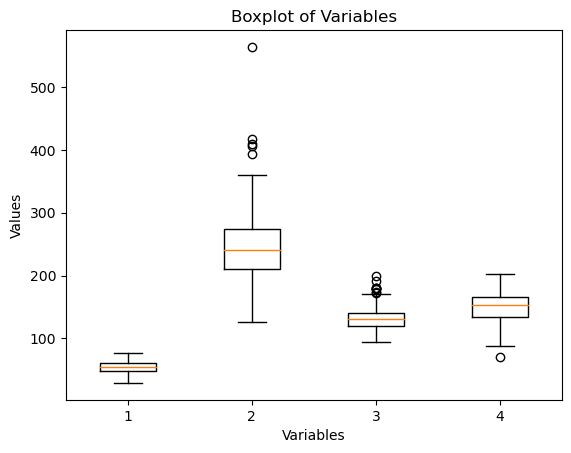

In [64]:
data = [df['age'], df['chol'], df['trtbps'], df['thalachh']]
plt.boxplot(data)

# Customize the plot (optional)
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Boxplot of Variables')

# Show the plot
plt.show()

In [65]:
columns = ['age', 'chol', 'trtbps', 'thalachh']

# Create a copy of the DataFrame
df_cleaned = df.copy()

# Iterate over the columns
for col in columns:
    # Calculate the quartiles
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier threshold
    outlier_threshold = 1.5 * IQR
    
    # Remove outliers
    df_cleaned = df_cleaned[(df[col] >= Q1 - outlier_threshold) & (df[col] <= Q3 + outlier_threshold)]

df = df_cleaned.copy()

C:\Users\jason\AppData\Local\Temp\ipykernel_45328\1930809334.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[(df[col] >= Q1 - outlier_threshold) & (df[col] <= Q3 + outlier_threshold)]
C:\Users\jason\AppData\Local\Temp\ipykernel_45328\1930809334.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[(df[col] >= Q1 - outlier_threshold) & (df[col] <= Q3 + outlier_threshold)]


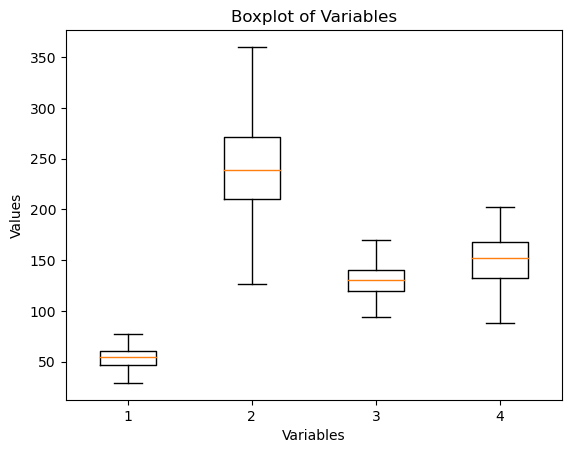

In [66]:
data = [df['age'], df['chol'], df['trtbps'], df['thalachh']]
plt.boxplot(data)

# Customize the plot (optional)
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Boxplot of Variables')

# Show the plot
plt.show()

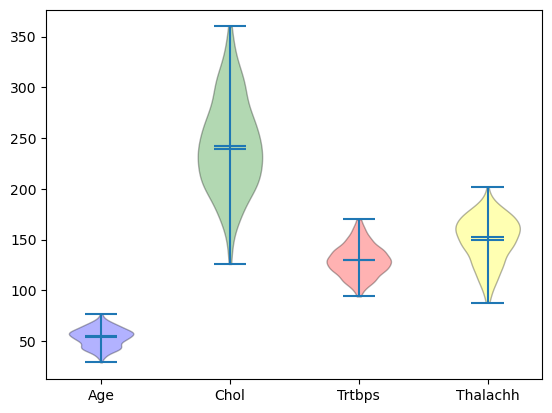

In [67]:
import matplotlib.pyplot as plt

data = [df['age'], df['chol'], df['trtbps'], df['thalachh']]

# Set the colors for each violin plot
colors = ['blue', 'green', 'red', 'yellow']

# Create the figure and axes
fig, ax = plt.subplots()

# Create the violin plots
violinplot = ax.violinplot(data, showmeans=True, showmedians=True)

# Set the colors for each violin
for i, body in enumerate(violinplot['bodies']):
    body.set_facecolor(colors[i])
    body.set_edgecolor('black')

# Set the labels and title
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Age', 'Chol', 'Trtbps', 'Thalachh'])

# Show the plot
plt.show()

<Axes: >

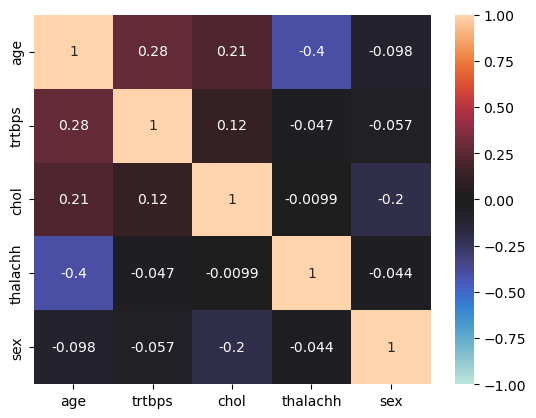

In [68]:
sns.heatmap(numerical_data.corr(), vmin = -1, vmax = 1, center = 0, annot = True)

<Axes: >

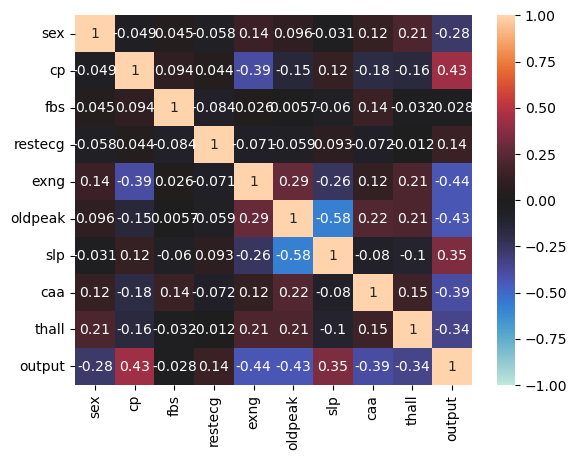

In [69]:
sns.heatmap(categorical_data.corr(), vmin = -1, vmax = 1, center = 0, annot = True)

## Model

We will now test our data against multiple models that map out binary output. Some models that come to mind are a logistic regression model, a neural network model, and both Naive Bayes versions.

We then will find the best model based on a classifcation report of each models and decide on a model that gives us the best accuracy.

In [70]:
X = df.drop("output", axis=1)
y = df["output"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) 


# Naive Bayes / Gaussian Naive Bayes

In [153]:
df_nb = df.copy()
df_nb = pd.DataFrame(preprocessing.OrdinalEncoder().fit_transform(df_nb), columns=df_nb.columns)
# OrdinalEncoder will skip numerical values. LabelEncoder also works as they share the same functionality.
display(df_nb.head(10))

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,29.0,1.0,3.0,31.0,64.0,1.0,0.0,47.0,0.0,22.0,0.0,0.0,1.0,1.0
1,3.0,1.0,2.0,22.0,79.0,0.0,1.0,82.0,0.0,32.0,0.0,0.0,2.0,1.0
2,7.0,0.0,1.0,22.0,35.0,0.0,0.0,69.0,0.0,14.0,2.0,0.0,2.0,1.0
3,22.0,1.0,1.0,14.0,67.0,0.0,1.0,74.0,0.0,8.0,2.0,0.0,2.0,1.0
4,23.0,0.0,0.0,14.0,143.0,0.0,1.0,60.0,1.0,6.0,2.0,0.0,2.0,1.0
5,23.0,1.0,0.0,28.0,25.0,0.0,1.0,45.0,0.0,4.0,1.0,0.0,1.0,1.0
6,22.0,0.0,1.0,28.0,115.0,0.0,0.0,50.0,0.0,13.0,1.0,0.0,2.0,1.0
7,10.0,1.0,1.0,14.0,91.0,0.0,1.0,70.0,0.0,0.0,2.0,0.0,3.0,1.0
8,23.0,1.0,2.0,34.0,9.0,0.0,1.0,71.0,0.0,16.0,2.0,0.0,2.0,1.0
9,20.0,1.0,0.0,28.0,68.0,0.0,1.0,57.0,0.0,12.0,2.0,0.0,2.0,1.0


In [152]:
df_nb_cats = df[['sex', 'cp', 'fbs', 'restecg', 'thalachh', 'exng', 'slp', 'caa', 'thall', 'output']]
X = df_nb_cats.drop(columns = ['output'])
y = df_nb_cats['output']
nb_train, nb_test = train_test_split(df_nb_cats, test_size=0.3)
X_nb_train, y_nb_train = nb_train.drop(columns=['output']), nb_train['output']
X_nb_test, y_nb_test = nb_test.drop(columns=['output']), nb_test['output']
clf_cat = CategoricalNB()
clf_cat.fit(X_nb_train, y_nb_train)

y_pred = clf_cat.predict(X_nb_test)
report = classification_report(y_nb_test, y_pred)
print(report)
print(df.shape)

              precision    recall  f1-score   support

           0       0.76      0.69      0.72        36
           1       0.80      0.84      0.82        51

    accuracy                           0.78        87
   macro avg       0.78      0.77      0.77        87
weighted avg       0.78      0.78      0.78        87

(288, 14)


In [151]:
df_nb_num = df[['age', 'trtbps', 'chol', 'thalachh', 'output']]
nb_train, nb_test = train_test_split(df_nb_num, test_size=0.3)
X_nb_train, y_nb_train = nb_train.drop(columns=['output']), nb_train['output']
X_nb_test, y_nb_test = nb_test.drop(columns=['output']), nb_test['output']
clf_cat = CategoricalNB()
clf_cat.fit(X_nb_train, y_nb_train)

y_pred = clf_cat.predict(X_nb_test)
report = classification_report(y_nb_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        38
           1       0.64      0.69      0.67        49

    accuracy                           0.61        87
   macro avg       0.60      0.60      0.60        87
weighted avg       0.61      0.61      0.61        87



# Logistic Regression

In [299]:
df_log = df.copy()
# splitting the data into training/testing set with 80:20
train, test = train_test_split(df_log, test_size = 0.3, random_state = 0)
# setting up the x_train/y_train dataset
X_train, y_train = train.drop(columns=['output']) ,train['output']
X_test, y_test = test.drop(columns=['output']), test['output']

cls = LogisticRegression()
cls.fit(X_train, y_train)
print(classification_report(y_test, cls.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81        45
           1       0.75      0.98      0.85        42

    accuracy                           0.83        87
   macro avg       0.86      0.83      0.83        87
weighted avg       0.86      0.83      0.82        87



c:\Users\jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Neural Network

In [302]:
X = df.drop('output', axis = 1)
y = df['output']

# normalize data using min-max normalization technique
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)
set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({'species': set_of_classes})

# using one-hot encoding to represent the set of classes. 
y = pd.get_dummies(y)
print("Pre-processed data :")
print(X)
print("Pre-processed class :")
print(y)

Pre-processed data :
          age  sex        cp    trtbps      chol  fbs  restecg  thalachh  \
0    0.708333  1.0  1.000000  0.671053  0.457265  1.0      0.0  0.543860   
1    0.166667  1.0  0.666667  0.473684  0.529915  0.0      0.5  0.868421   
2    0.250000  0.0  0.333333  0.473684  0.333333  0.0      0.0  0.736842   
3    0.562500  1.0  0.333333  0.342105  0.470085  0.0      0.5  0.789474   
4    0.583333  0.0  0.000000  0.342105  0.974359  0.0      0.5  0.657895   
..        ...  ...       ...       ...       ...  ...      ...       ...   
283  0.583333  0.0  0.000000  0.605263  0.491453  0.0      0.5  0.307018   
284  0.333333  1.0  1.000000  0.210526  0.589744  0.0      0.5  0.385965   
285  0.812500  1.0  0.000000  0.657895  0.286325  1.0      0.5  0.464912   
286  0.583333  1.0  0.000000  0.473684  0.021368  0.0      0.5  0.236842   
287  0.583333  0.0  0.333333  0.473684  0.470085  0.0      0.0  0.754386   

     exng   oldpeak  slp   caa     thall  
0     0.0  0.370968  0.

In [318]:
# splitting data into ratio 80:20
data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.3)

# hidden layer of (12, 3)
# learning rate of 0.05
# of epochs is 500
# sigmoid function is used (activation = 'logistic')
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.05, batch_size = 10, hidden_layer_sizes = (20, 5), max_iter = 500)
mlp.fit(data_train, class_train)
pred = mlp.predict(data_test)

#prediction on the test data. species are represented using the hot-keys

print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))

Accuracy :  0.8505747126436781
Mean Square Error :  0.14942528735632185
Confusion Matrix for each label : 
[[[52  1]
  [12 22]]

 [[22 12]
  [ 1 52]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        34
           1       0.81      0.98      0.89        53

   micro avg       0.85      0.85      0.85        87
   macro avg       0.88      0.81      0.83        87
weighted avg       0.87      0.85      0.84        87
 samples avg       0.85      0.85      0.85        87



# It seems that the neural network is the best and we will use evaluation metrics such as K-fold-crossing to really test it's effectiveness. If it proves to be the highest accuracy, we can then work on fine-tuning the model and partioning the data such that it will provide better metrics such as age and sex.

In [319]:
# using 5 fold cross validation by making n_splits = 5
n_splits= 8
# step 1: randomize the dataset and create k equal size partitions
kf = KFold(n_splits=n_splits)

acc = 0
mse = 0

i = 0 #keep track of batch number
# step 5: iterate k times with a different testing subset
for train_indices, test_indices in kf.split(X):

    # step 2-3: use k-1/k^th partition for the training/testing model
    start_train, stop_train = train_indices[0], train_indices[-1]+1
    start_test, stop_test = test_indices[0], test_indices[-1]+1
    
    # hidden layer of (12, 3)
    # learning rate of 0.3
    # of epochs is 500
    # sigmoid function is used (activation = 'logistic')
    mlp = MLPClassifier(solver = 'sgd', random_state = 0, activation = 'logistic', learning_rate_init = 0.05, batch_size = 10, hidden_layer_sizes = (20, 5), max_iter = 500)
    mlp.fit(X[start_train:stop_train], y[start_train:stop_train])
    pred = mlp.predict(X[start_test:stop_test])
    
    # step 4: record the evaluating scores
    i+=1
    acc += accuracy_score(y[start_test:stop_test], pred)
    mse += mean_squared_error(y[start_test:stop_test], pred)
    
    print("\nAccuracy for batch ", i, " : ", accuracy_score(y[start_test:stop_test], pred))
    print("Mean Square Error for batch ", i, " : ", mean_squared_error(y[start_test:stop_test], pred))

# step 6: find the average and select the batch with highest evaluation scores
print('\nAverage Accuracy = ', acc / n_splits)
print('Average MSE = ', mse / n_splits)


Accuracy for batch  1  :  0.75
Mean Square Error for batch  1  :  0.25

Accuracy for batch  2  :  0.9166666666666666
Mean Square Error for batch  2  :  0.08333333333333333

Accuracy for batch  3  :  0.9444444444444444
Mean Square Error for batch  3  :  0.05555555555555555

Accuracy for batch  4  :  0.9444444444444444
Mean Square Error for batch  4  :  0.05555555555555555

Accuracy for batch  5  :  0.8055555555555556
Mean Square Error for batch  5  :  0.19444444444444445

Accuracy for batch  6  :  0.8055555555555556
Mean Square Error for batch  6  :  0.19444444444444445

Accuracy for batch  7  :  0.8333333333333334
Mean Square Error for batch  7  :  0.16666666666666666

Accuracy for batch  8  :  0.5277777777777778
Mean Square Error for batch  8  :  0.4722222222222222

Average Accuracy =  0.8159722222222221
Average MSE =  0.18402777777777776


In [320]:
df_m = df[df['sex'] == 1]
df_f = df[df['sex'] == 0]

In [321]:
X = df_m.drop('output', axis = 1)
y = df_m['output']

In [338]:
# normalize data using min-max normalization technique
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)
set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({'species': set_of_classes})

# using one-hot encoding to represent the set of classes. 
y = pd.get_dummies(y)

# splitting data into ratio 80:20
data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.3)

# hidden layer of (12, 3)
# learning rate of 0.05
# of epochs is 500
# sigmoid function is used (activation = 'logistic')
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.05, batch_size = 10, hidden_layer_sizes = (20, 5), max_iter = 1000)
mlp.fit(data_train, class_train)
pred = mlp.predict(data_test)

#prediction on the test data. species are represented using the hot-keys

print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))

Accuracy :  0.8524590163934426
Mean Square Error :  0.14754098360655737
Confusion Matrix for each label : 
[[[21  1]
  [ 8 31]]

 [[31  8]
  [ 1 21]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.79      0.87        39
           1       0.72      0.95      0.82        22

   micro avg       0.85      0.85      0.85        61
   macro avg       0.85      0.87      0.85        61
weighted avg       0.88      0.85      0.86        61
 samples avg       0.85      0.85      0.85        61



In [341]:
X = df_f.drop('output', axis = 1)
y = df_f['output']

scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)
set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({'species': set_of_classes})

y = pd.get_dummies(y)

data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.3)

# hidden layer of (14, 4)
# learning rate of 0.05
# of epochs is 500
# sigmoid function is used (activation = 'logistic')
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.05, batch_size = 10, hidden_layer_sizes = (20, 5), max_iter = 1000)
mlp.fit(data_train, class_train)
pred = mlp.predict(data_test)

#prediction on the test data. species are represented using the hot-keys

print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))

Accuracy :  0.9230769230769231
Mean Square Error :  0.07692307692307693
Confusion Matrix for each label : 
[[[22  1]
  [ 1  2]]

 [[ 2  1]
  [ 1 22]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.96      0.96      0.96        23

   micro avg       0.92      0.92      0.92        26
   macro avg       0.81      0.81      0.81        26
weighted avg       0.92      0.92      0.92        26
 samples avg       0.92      0.92      0.92        26



# Now let's see if partioning between old and young does anything.

In [215]:
df_young = df[df['age'] < 50]
df_old = df[df['age'] >= 50]

In [231]:
X = df_young.drop('output', axis = 1)
y = df_young['output']

scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)
set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({'species': set_of_classes})

y = pd.get_dummies(y)

data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.3)

# hidden layer of (14, 4)
# learning rate of 0.05
# of epochs is 500
# sigmoid function is used (activation = 'logistic')
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.05, batch_size = 10, hidden_layer_sizes = (20, 5), max_iter = 1000)
mlp.fit(data_train, class_train)
pred = mlp.predict(data_test)

#prediction on the test data. species are represented using the hot-keys

print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))

Accuracy :  0.9629629629629629
Mean Square Error :  0.037037037037037035
Confusion Matrix for each label : 
[[[17  0]
  [ 1  9]]

 [[ 9  1]
  [ 0 17]]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.94      1.00      0.97        17

   micro avg       0.96      0.96      0.96        27
   macro avg       0.97      0.95      0.96        27
weighted avg       0.97      0.96      0.96        27
 samples avg       0.96      0.96      0.96        27



In [342]:
X = df_old.drop('output', axis = 1)
y = df_old['output']

scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)
set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({'species': set_of_classes})

y = pd.get_dummies(y)

data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.3)

# hidden layer of (14, 4)
# learning rate of 0.05
# of epochs is 500
# sigmoid function is used (activation = 'logistic')
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.05, batch_size = 10, hidden_layer_sizes = (20, 5), max_iter = 1000)
mlp.fit(data_train, class_train)
pred = mlp.predict(data_test)

#prediction on the test data. species are represented using the hot-keys

print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))

Accuracy :  0.8
Mean Square Error :  0.2
Confusion Matrix for each label : 
[[[23  7]
  [ 5 25]]

 [[25  5]
  [ 7 23]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        30
           1       0.82      0.77      0.79        30

   micro avg       0.80      0.80      0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60
 samples avg       0.80      0.80      0.80        60



In [343]:
df_young_f = df_f.copy()
df_old_f = df_f.copy()

df_young_f = df_f[df_f['age'] < 50]
df_old_f = df_f[df_f['age'] >= 50]

df_young_m = df_m.copy()
df_old_m = df_m.copy()

df_young_m = df_m[df_m['age'] < 50]
df_old_m = df_m[df_m['age'] >= 50]

In [344]:
X = df_young_f.drop('output', axis = 1)
y = df_young_f['output']

scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)
set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({'species': set_of_classes})

y = pd.get_dummies(y)

data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.3)

# hidden layer of (14, 4)
# learning rate of 0.05
# of epochs is 500
# sigmoid function is used (activation = 'logistic')
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.05, batch_size = 10, hidden_layer_sizes = (20, 5), max_iter = 1000)
mlp.fit(data_train, class_train)
pred = mlp.predict(data_test)

#prediction on the test data. species are represented using the hot-keys

print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))

Accuracy :  1.0
Mean Square Error :  0.0
Confusion Matrix for each label : 
[[[8 0]
  [0 0]]

 [[0 0]
  [0 8]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00         8
   macro avg       0.50      0.50      0.50         8
weighted avg       1.00      1.00      1.00         8
 samples avg       1.00      1.00      1.00         8



c:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [380]:
X = df_old_f.drop('output', axis = 1)
y = df_old_f['output']

scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)
set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({'species': set_of_classes})

y = pd.get_dummies(y)

data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.3)

# hidden layer of (14, 4)
# learning rate of 0.05
# of epochs is 500
# sigmoid function is used (activation = 'logistic')
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.05, batch_size = 10, hidden_layer_sizes = (20, 5), max_iter = 1000)
mlp.fit(data_train, class_train)
pred = mlp.predict(data_test)

#prediction on the test data. species are represented using the hot-keys

print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))

Accuracy :  0.9473684210526315
Mean Square Error :  0.05263157894736842
Confusion Matrix for each label : 
[[[14  1]
  [ 0  4]]

 [[ 4  0]
  [ 1 14]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.93      0.97        15

   micro avg       0.95      0.95      0.95        19
   macro avg       0.90      0.97      0.93        19
weighted avg       0.96      0.95      0.95        19
 samples avg       0.95      0.95      0.95        19



In [379]:
X = df_old_m.drop('output', axis = 1)
y = df_old_m['output']

scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)
set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({'species': set_of_classes})

y = pd.get_dummies(y)

data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.3)

# hidden layer of (14, 4)
# learning rate of 0.05
# of epochs is 500
# sigmoid function is used (activation = 'logistic')
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.05, batch_size = 10, hidden_layer_sizes = (20, 5), max_iter = 1000)
mlp.fit(data_train, class_train)
pred = mlp.predict(data_test)

#prediction on the test data. species are represented using the hot-keys

print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))

Accuracy :  0.8571428571428571
Mean Square Error :  0.14285714285714285
Confusion Matrix for each label : 
[[[ 8  3]
  [ 3 28]]

 [[28  3]
  [ 3  8]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        31
           1       0.73      0.73      0.73        11

   micro avg       0.86      0.86      0.86        42
   macro avg       0.82      0.82      0.82        42
weighted avg       0.86      0.86      0.86        42
 samples avg       0.86      0.86      0.86        42



In [368]:
X = df_young_m.drop('output', axis = 1)
y = df_young_m['output']

scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)
set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({'species': set_of_classes})

y = pd.get_dummies(y)

data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.3)

# hidden layer of (14, 4)
# learning rate of 0.05
# of epochs is 500
# sigmoid function is used (activation = 'logistic')
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.05, batch_size = 10, hidden_layer_sizes = (20, 5), max_iter = 1000)
mlp.fit(data_train, class_train)
pred = mlp.predict(data_test)

#prediction on the test data. species are represented using the hot-keys

print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred))

Accuracy :  0.9
Mean Square Error :  0.1
Confusion Matrix for each label : 
[[[14  1]
  [ 1  4]]

 [[ 4  1]
  [ 1 14]]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.93      0.93      0.93        15

   micro avg       0.90      0.90      0.90        20
   macro avg       0.87      0.87      0.87        20
weighted avg       0.90      0.90      0.90        20
 samples avg       0.90      0.90      0.90        20



c:\Users\jason\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
